In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [44]:
df1 = pd.read_csv("https://raw.githubusercontent.com/MiroPlacido/Datasets/refs/heads/main/clima_india.csv", index_col="date", parse_dates=True)
df1 = df1[["wind_speed"]]

In [64]:
df1['wind_speed_diff'] = df1.wind_speed.diff()
df1 = df1.dropna()

In [66]:
result = adfuller(df1.wind_speed.values)
print('p-value: %f' % result[1])
#menor que 0,05

p-value: 0.002714


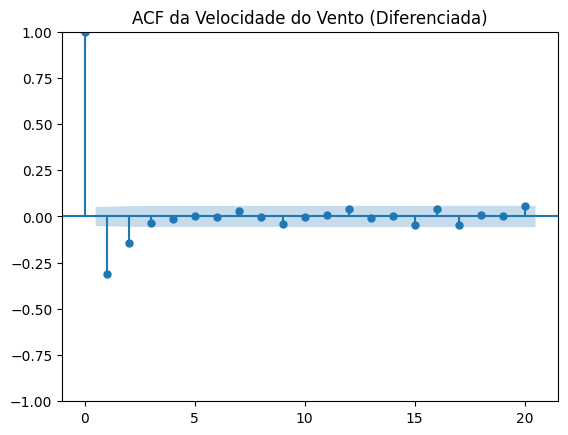

In [67]:
plot_acf(df1['wind_speed_diff'], lags=20)
plt.title('ACF da Velocidade do Vento (Diferenciada)')
plt.show()

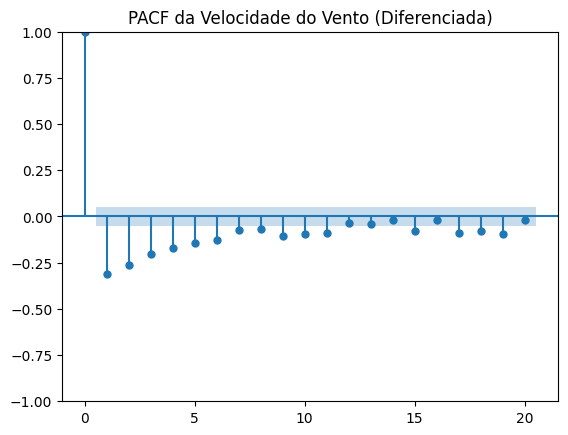

In [68]:
plot_pacf(df1['wind_speed_diff'], lags=20)
plt.title('PACF da Velocidade do Vento (Diferenciada)')
plt.show()

In [69]:
df1.index.freq = 'D'

In [70]:
model1 = ARIMA(df1['wind_speed'], order=(1, 1, 1)).fit()

forecast_diff1 = model1.forecast(steps=1)

last_observation = df1.wind_speed[-1]

forecast1 = forecast_diff1[0] + last_observation

print("Modelo ARIMA (1, 1, 1):")
print("AIC:", model1.aic)
print("BIC:", model1.bic)
print("Previsão para o próximo dia:", forecast1)

Modelo ARIMA (1, 1, 1):
AIC: 8220.194294975801
BIC: 8236.050814621369
Previsão para o próximo dia: 4.1424453122328435


<ipython-input-70-4f2b36463c3f>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_observation = df1.wind_speed[-1]
<ipython-input-70-4f2b36463c3f>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast1 = forecast_diff1[0] + last_observation


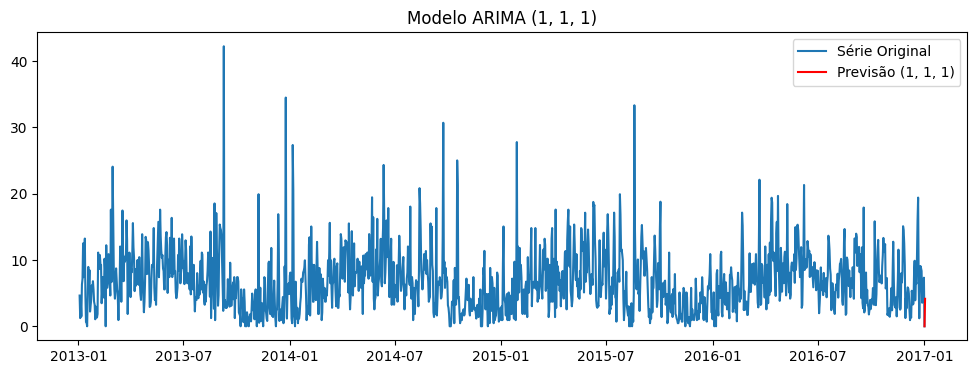

In [71]:
plt.figure(figsize=(12, 4))
plt.plot(df1['wind_speed'], label='Série Original')
plt.plot(pd.date_range(df1.index[-1], periods=2, freq='D'), [last_observation, forecast1], label='Previsão (1, 1, 1)', color='red')
plt.title("Modelo ARIMA (1, 1, 1)")
plt.legend()
plt.show()


In [72]:
model2 = ARIMA(df1['wind_speed'], order=(1, 1, 2)).fit()

forecast_diff2 = model2.forecast(steps=1)

forecast2 = forecast_diff2[0] + last_observation

print("Modelo ARIMA (1, 1, 2):")
print("AIC:", model2.aic)
print("BIC:", model2.bic)
print("Previsão para o próximo dia:", forecast2)
print("-" * 20)

Modelo ARIMA (1, 1, 2):
AIC: 8220.475937009835
BIC: 8241.617963203926
Previsão para o próximo dia: 4.052816950456464
--------------------


<ipython-input-72-89bfe013a57f>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast2 = forecast_diff2[0] + last_observation


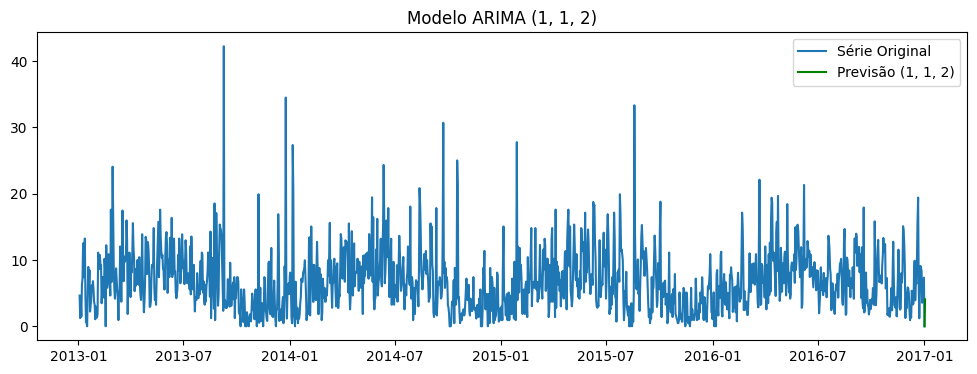

In [73]:
plt.figure(figsize=(12, 4))
plt.plot(df1['wind_speed'], label='Série Original')
plt.plot(pd.date_range(df1.index[-1], periods=2, freq='D'), [last_observation, forecast2], label='Previsão (1, 1, 2)', color='green')
plt.title("Modelo ARIMA (1, 1, 2)")
plt.legend()
plt.show()

O modelo ARIMA(1, 1, 1) apresenta um AIC mais baixo (8225.20) e um BIC mais baixo (8241.06) em comparação com o modelo ARIMA(1, 1, 2), levando à escolha do Modelo (1,1,1)